<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [63]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [64]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [65]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [66]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [67]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### I do not notice any issues with the data.

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [69]:
combined = X.merge(y, left_index=True, right_index=True)

In [70]:
combined.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     0  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [71]:
combined.rename(index=str, columns={0: 'y'}, inplace=True)

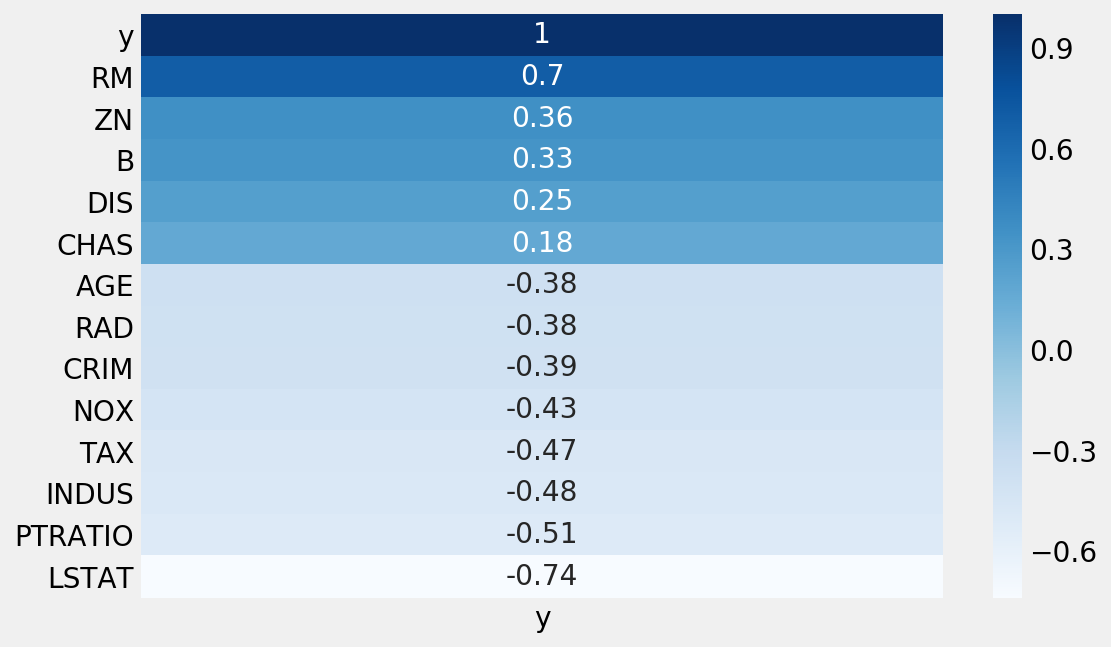

In [72]:
plt.figure(figsize=(8, 5))

sns.heatmap(combined.corr()[['y']].sort_values('y', ascending=False), annot=True, cmap='Blues');

In [73]:
X = X[['LSTAT','RM','PTRATIO']]

In [74]:
y = pd.DataFrame(boston.target)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
cross_val_score(lr, X_train, y_train).mean()

0.6800909425657196

In [79]:
lr.score(X_test, y_test)

0.647819197757606

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

### 70-30

In [80]:
X_70_30_train, X_70_30_test, y_70_30_train, y_70_30_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [81]:
lr = LinearRegression()

In [82]:
model = lr.fit(X_70_30_train, y_70_30_train)

In [83]:
predictions = model.predict(X)

In [84]:
cross_val_score(lr, X_70_30_train, y_70_30_train).mean()

0.6694624937172646

In [85]:
lr.score(X_70_30_test, y_70_30_test)

0.650904156861472

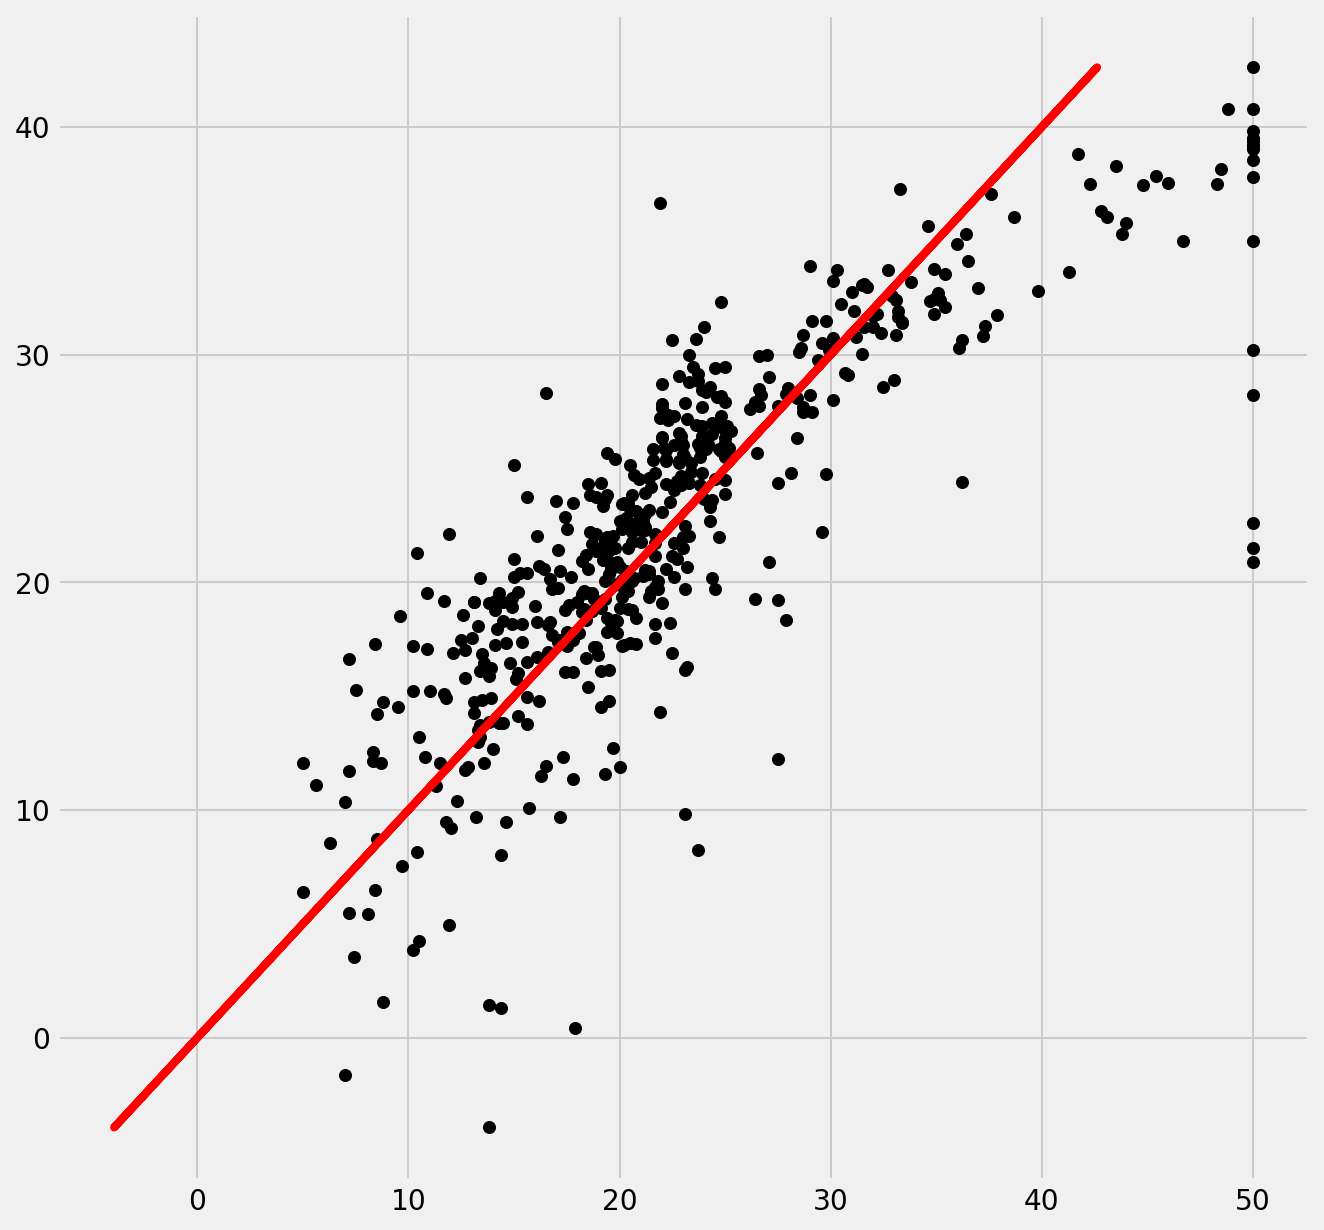

In [86]:
plt.figure(figsize=(10,10))

plt.scatter(y, predictions, c='k');

plt.plot(predictions, predictions, color='r');

---

### 90-10

In [87]:
X_90_10_train, X_90_10_test, y_90_10_train, y_90_10_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [88]:
lr = LinearRegression()

In [89]:
model = lr.fit(X_90_10_train, y_90_10_train)

In [90]:
predictions = model.predict(X)

In [91]:
cross_val_score(lr, X_90_10_train, y_90_10_train).mean()

0.6633834228182726

In [92]:
lr.score(X_90_10_test, y_90_10_test)

0.7452159446021683

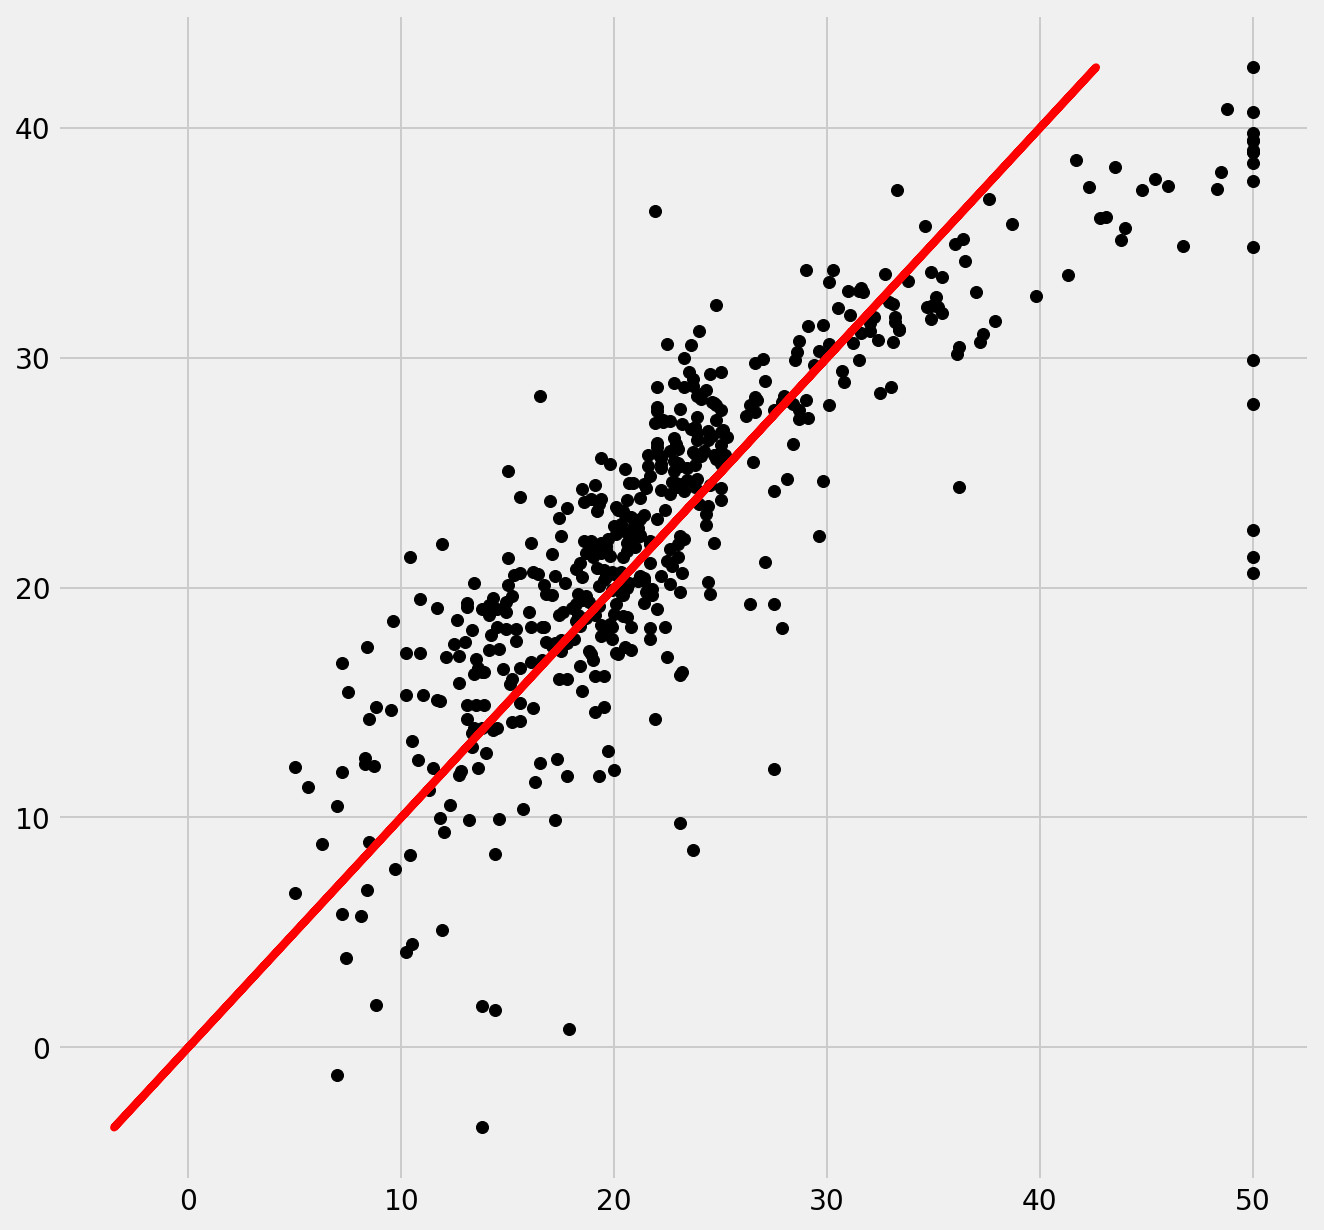

In [93]:
plt.figure(figsize=(10,10))

plt.scatter(y, predictions, c='k');

plt.plot(predictions, predictions, color='r');

---

## A:

#### As I reduce the test size from 50% to 30% then to 10%, the score produced from Cross Validating the training data doesn't seem to change too much, going from 0.6800 to 0.6695 to 0.6634.  Although the Cross-Val score produced by the training data doesn't change much, I do notice that it is decreasing as I decrease the test size.  The score produced by the test sets, on the other hand, do change considerably, and are increasing.  As I decrease the test size from 50% to 10%, the R-squared score on the test sets increases from 0.6478 to 0.6509 to 0.7452.  Given this information, it seems that as I decrease the test size, the models seem to 'overfit' less, and therefore perform better on unseen data.

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

### Data split 50/50

k = 5

In [94]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6844089460670221

k = 7

In [95]:
cross_val_score(lr, X_train, y_train, cv=7).mean()

0.691603262511277

k = 10

In [96]:
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.6858971993987667

---

### Data split 70/30

k = 5

In [97]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=5).mean()

0.6514013322645468

k = 7

In [98]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=7).mean()

0.6690106551742475

k = 10

In [99]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=10).mean()

0.6475377682499583

---

### Data split 90/10

k = 5

In [100]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=5).mean()

0.6574727685134194

k = 7

In [101]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=7).mean()

0.6617216556026738

k = 10

In [102]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=10).mean()

0.6512518527640038

---

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [103]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [104]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [10]:
import patsy

# A: